<a href="https://colab.research.google.com/github/robson-rsp/datascience/blob/main/regression/california_housing_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# California housing prices

A tarefa neste kernel é criar um modelo de Machine Learning que estime preços de imóveis no estado da Califórnia baseado em características, como: 

* latitude/longitude: Localização do imóvel
* housing_median_age: Idade média dos imóveis naquela quadra
* totalRooms: Número total de cômodos dentro de um quarteirão
* totalBedrooms: Número total de quartos dentro de um quarteirão
* population: Número total de pessoas que moram em uma quadra
* households: Número total de habitações em uma quadra
* medianIncome: Renda média das famílias de uma quadra (medida em dezenas de milhares de dólares americanos)
* medianHouseValue: Valor médio dos imóveis de uma quadra (medido em dólares americanos)
* oceanProximity: Localização do imóvel em relação ao oceano/mar

Obs. A média populacional desses quarteirões é de 600 até 3000 pessoas.

Fonte: https://www.kaggle.com/datasets/camnugent/california-housing-prices

# Initial imports

In [ ]:
%pip install ipython-autotime  --upgrade
%pip install matplotlib        --upgrade
%pip install pandas            --upgrade
%pip install scikit-learn      --upgrade
%pip install seaborn           --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 30.2 s (started: 2023-04-15 20:52:56 +00:00)


In [ ]:
from google.colab import drive, files

import pandas as pd
import warnings

drive.mount('/content/drive', force_remount=True)
warnings.filterwarnings("ignore")
%load_ext autotime

dataset = pd.read_csv("/content/drive/MyDrive/datasets/housing/housing.csv", encoding='utf-8')

Mounted at /content/drive
time: 56 ms (started: 2023-04-15 20:54:12 +00:00)


# EDA

In [ ]:
dataset.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


time: 27.2 ms (started: 2023-04-15 00:05:49 +00:00)


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
time: 18 ms (started: 2023-04-15 00:05:49 +00:00)


In [ ]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


time: 56.5 ms (started: 2023-04-15 00:05:49 +00:00)


## Data visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

time: 611 µs (started: 2023-04-15 00:05:49 +00:00)


Vou verificar se há alguma relação entre a renda média das famílias e os preços dos imóveis.

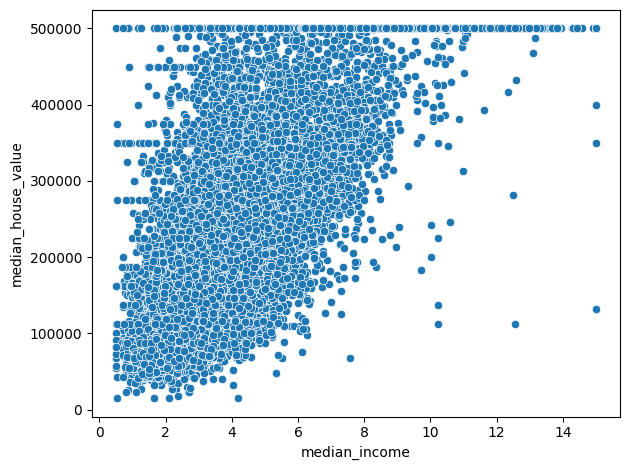

time: 413 ms (started: 2023-04-15 00:05:49 +00:00)


In [ ]:
sns.scatterplot(data=dataset, x='median_income', y='median_house_value')
plt.tight_layout()
plt.show()

**Conclusão:** Há uma forte relação entre a renda média e os preços dos imóveis. Mas parece haver um limite de preço $500.000 e isso pode fazer com que o modelo não estipule valores maiores. Na fase de engenharia de atributos vou remover esses registros para dar mais liberdade ao modelo.

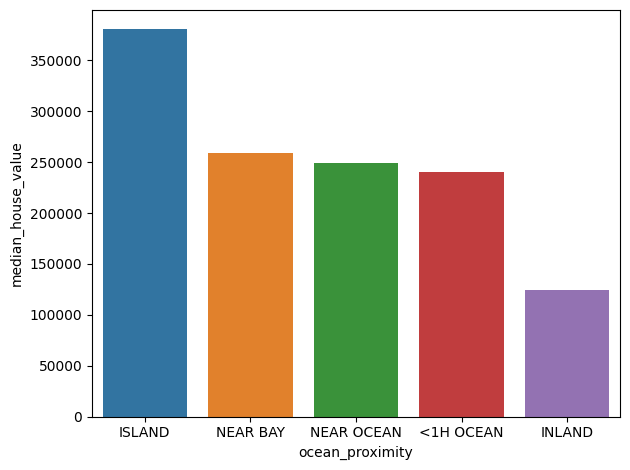

time: 304 ms (started: 2023-04-15 00:05:50 +00:00)


In [ ]:
sns.barplot(data=dataset, x='ocean_proximity', y='median_house_value', 
            order=dataset.groupby(['ocean_proximity'])['median_house_value'].mean().sort_values(ascending=False).index, ci=None)
plt.tight_layout()
plt.show()

**Conclusão:** Claramente regiões mais próximas ao oceano são mais caras.

Vou Verificar se a idade das casas afeta o seu preço.

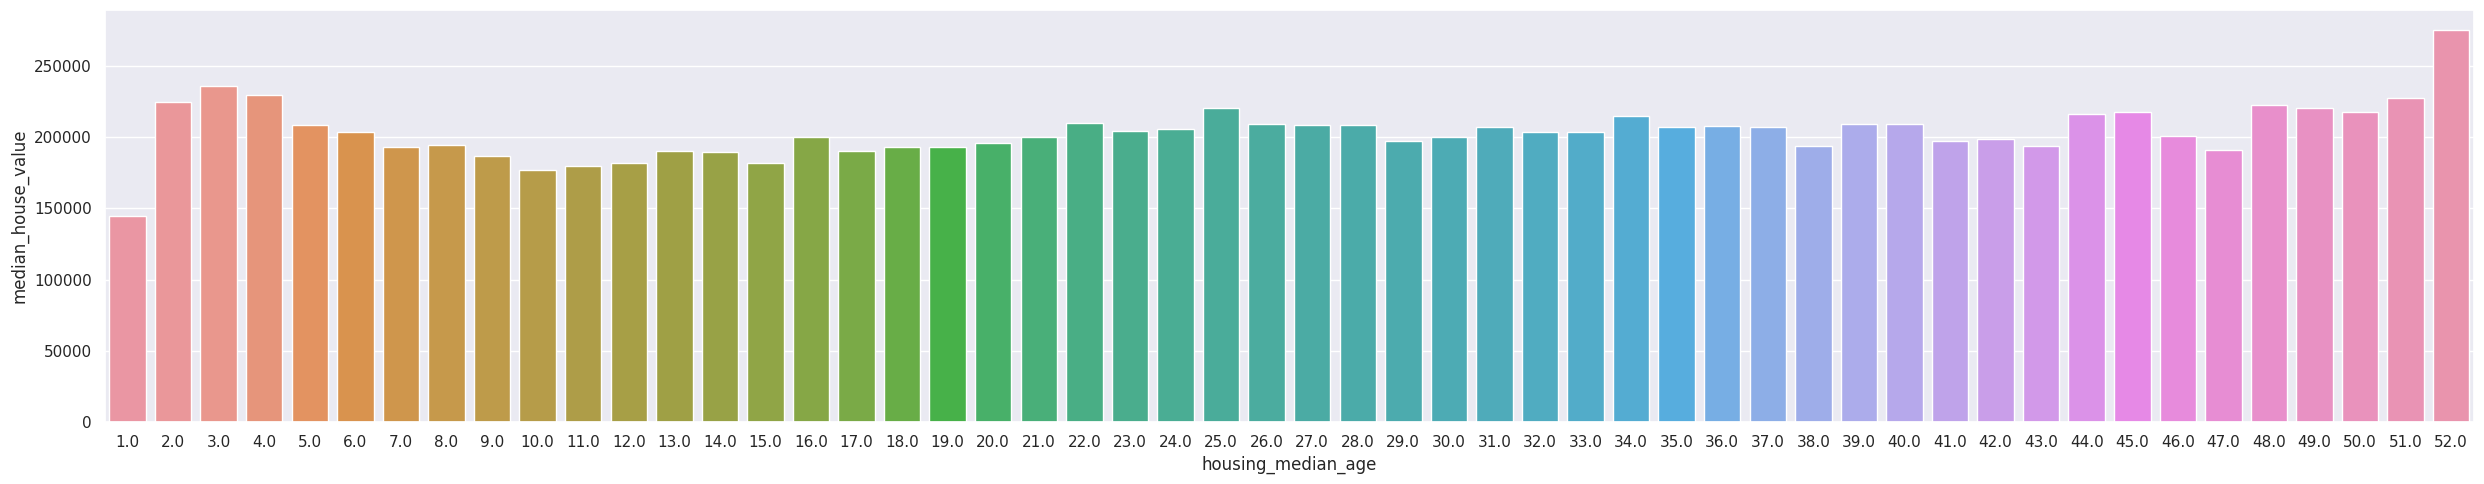

time: 1.09 s (started: 2023-04-15 00:05:50 +00:00)


In [ ]:
sns.set(rc={'figure.figsize':(25, 5)})
sns.barplot(data=dataset, x='housing_median_age', y='median_house_value', ci=None)
plt.tight_layout()
plt.show()

**Conclusão:** Não está claro se as idades são em anos, mas acredito que sim. De qualquer modo, parece não haver qualquer relação entre a idade dos imóveis e seus preços.

Vou considerar o atributo 'population' como sendo a densidade populacional. A densidade seria a quantidade de pessoas que vivem em uma determinada área, mas não tenho como saber a área média das quadras. Quero ver se há relação entre densidade populacional e os preços dos imóveis.

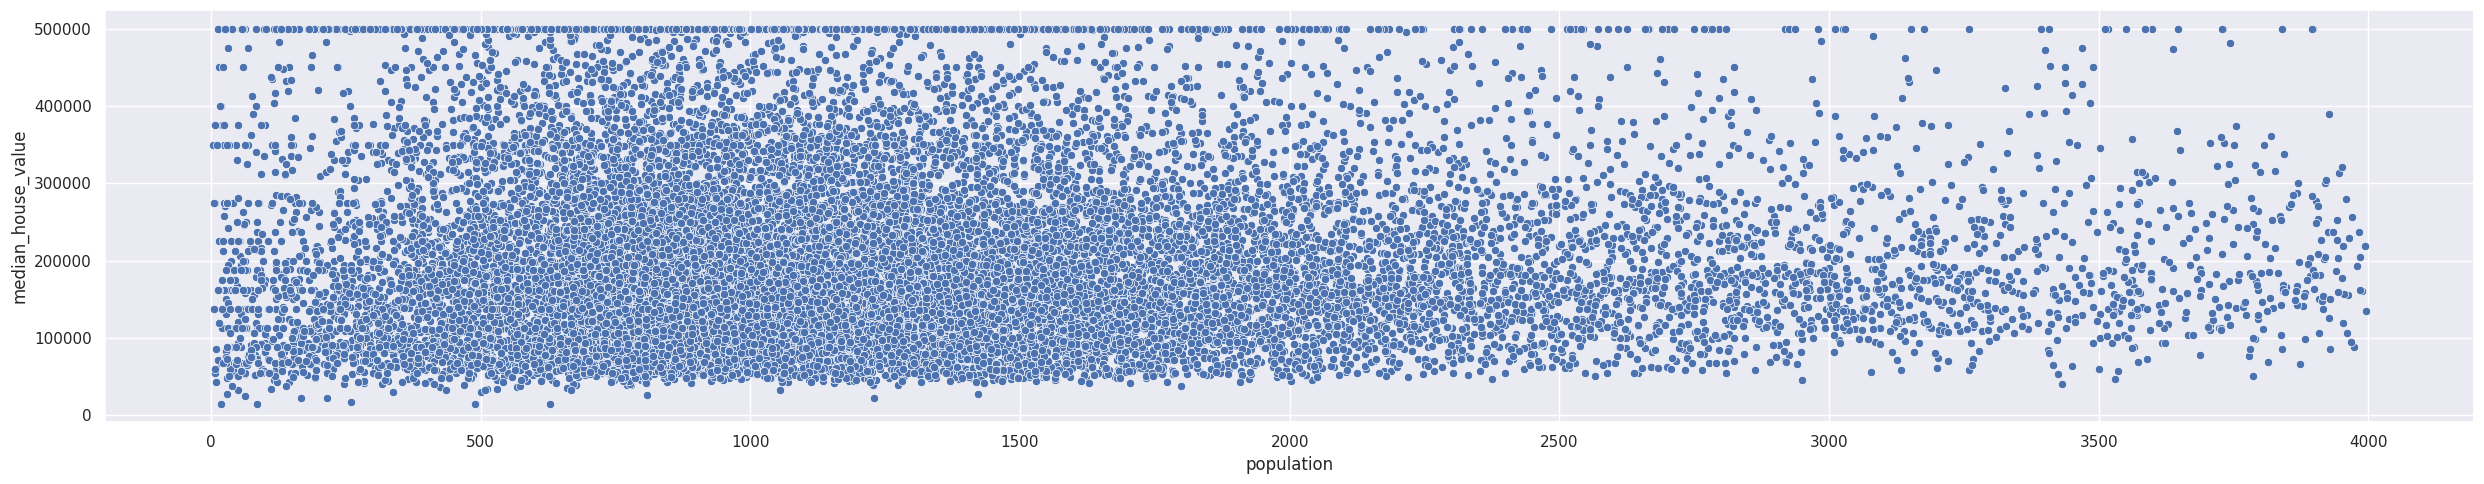

time: 679 ms (started: 2023-04-15 00:05:51 +00:00)


In [ ]:
mask = dataset['population'] < 4000
ds = dataset[mask]
sns.scatterplot(data=ds, x='population', y='median_house_value')
plt.tight_layout()
plt.show()

**Conclusão:** Não há nenhuma relação aparente entre esses dois atributos, mas mais uma vez fica evidente o limite de preços de imóveis em $500.000. Definitivamente preciso remover esses valores para que o modelo fique livre para fazer estimativas de preços  mais altas.

# Train/Test split

In [ ]:
from sklearn.model_selection import train_test_split

time: 395 ms (started: 2023-04-15 20:54:27 +00:00)


A remoção dos registros com 'median_house_value=500_000' será feita nesse estágio para eu não precisar criar uma classe só para isso na etapa de engenharia de atributos.

In [ ]:
mask = dataset['median_house_value'] == 500001.0
dataset = dataset[~mask]

time: 5.03 ms (started: 2023-04-15 20:54:29 +00:00)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset, dataset['median_house_value'], test_size=0.2, random_state=42)

time: 5.83 ms (started: 2023-04-15 20:54:33 +00:00)


# Feature engineering

In [ ]:
%pip install category-encoders

In [ ]:
from category_encoders     import TargetEncoder
from sklearn.base          import BaseEstimator, TransformerMixin
from sklearn.compose       import ColumnTransformer
from sklearn.impute        import KNNImputer
from sklearn.pipeline      import Pipeline
from sklearn.preprocessing import StandardScaler

time: 296 ms (started: 2023-04-15 20:54:42 +00:00)


A classe ColumnTransformer retorna por padrão um numpy array, mas para gerenciar melhor os atributos que passarão por transformações através de um pipeline, prefiro que ela retorne sempre um objeto DataFrame do Pandas. O problema é que este vem com os nomes das colunas alterados, então resolvi criar a classe abaixo para atribuir ao DataFrame que saiu do ColumnTransformer os nomes originais

In [ ]:
class FeaturesRenamer(BaseEstimator, TransformerMixin):
    """
    Esta classe deve ser colocada diretamente dentro de um Pipeline.
    Quando 'get_feature_names_out()' é chamado ele concatena o nome do transformador ao nome de cada coluna
    que passará pela transformação. Esta classe desfaz isso retornando os nomes originais.
    """
    def __init__(self, original_names):
        if isinstance(original_names, list):
            self.original_names = original_names
        else:
            self.original_names = list(original_names)
    def fit(self, X, y=None):
        return self
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X, y)
    def transform(self, X, y=None):
        new_names = list()
        for name in list(X.columns):
            for original in self.original_names:
                if name.endswith('__' + original):
                    new_names.append(original)
        return X.set_axis(new_names, axis=1)

time: 859 µs (started: 2023-04-15 20:54:45 +00:00)


## Categorical features

**Etapa ##:** Codificar os atributos nominais.

In [ ]:
ct_nominal = ColumnTransformer(transformers=[('target_encoder', TargetEncoder(), ['ocean_proximity'])], remainder='passthrough')
ct_nominal.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('target_encoder', TargetEncoder(),
                                 ['ocean_proximity'])])

time: 7.26 ms (started: 2023-04-15 20:54:49 +00:00)


**Etapa final:** Pipeline categórico completo.

In [ ]:
pipeline_cat = Pipeline(steps=[('ct_nominal', ct_nominal), 
                               ('renamer01', FeaturesRenamer(dataset.columns)),])

time: 634 µs (started: 2023-04-15 20:54:50 +00:00)


## Numerical features

**Etapa ##:** Imputar valores nos campos NaN. A classe KNNImputer vai encontrar os n_neighbors mais próximos ao registro que contém um campo nulo em um determinado atributo. A imputação será feita pela média aritmética deste atributo entre os registros vizinhos.

In [ ]:
ct_nan = ColumnTransformer(transformers=[('knn_imputer', KNNImputer(n_neighbors=4), ['total_bedrooms'])], remainder='passthrough')
ct_nan.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('knn_imputer', KNNImputer(n_neighbors=4),
                                 ['total_bedrooms'])])

time: 19.5 ms (started: 2023-04-15 20:54:55 +00:00)


**Etapa ##:** Os atributos 'total_rooms' e 'total_bedrooms' não fazem sentido se eu deixá-los da forma como estão. 'total_rooms' refere-se à quantidade total de cômodos que há em cada quadra. 'total_bedrooms' refere-se à quantidade total de quartos que há em cada quadra. Vou criar novos atributos a partir dos existentes. Vou fazer isso dentro de uma classe para usar a classe Pipeline.

**1.   mean_bedrooms_households:** Quantidade média de quartos por habitação.

**2.   mean_rooms_households:** Quantidade média de cômodos por habitação.

**3.   mean_population_households:** Quantidade média de moradores por imóvel.

In [ ]:
class MeanFeatures(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self
  def fit_transform(self, X, y=None):
    self.fit(X, y)
    return self.transform(X, y)
  def transform(self, X, y=None):
    X['mean_bedrooms_households']   = X['total_bedrooms'] / X['households']
    X['mean_rooms_households']      = X['total_rooms']    / X['households']
    X['mean_population_households'] = X['population']     / X['households']
    X = X.drop('total_bedrooms', axis=1)
    X = X.drop('total_rooms', axis=1)
    return X



pp_mean_features = Pipeline(steps=[('mean_features', MeanFeatures())])

time: 2.5 ms (started: 2023-04-15 20:55:02 +00:00)


**Etapa final:** Pipeline numérico completo.

In [ ]:
pipeline_num = Pipeline(steps=[('ct_nan', ct_nan),
                               ('renamer01', FeaturesRenamer(dataset.columns)),
                               ('pp_mean_features', pp_mean_features)])

time: 653 µs (started: 2023-04-15 20:55:05 +00:00)


## Full pipeline

In [ ]:
pipeline_full = Pipeline(steps=[('pipeline_cat',    pipeline_cat),
                                ('pipeline_num',    pipeline_num),
                                ('pipeline_scaler', StandardScaler())])

X_train = pipeline_full.fit_transform(X_train, y_train)
X_test  = pipeline_full.transform(X_test)

time: 408 ms (started: 2023-04-15 20:55:08 +00:00)


# Model training

Vou escolher três modelos candidatos.

*   ElasticNet: Modelo linear.
*   RandomForestRegressor: Ensemble baseado em árvores de decisões. 
*   XGBRegressor: Ensemble baseado em árvores de deciões.

PolinomialFeatures vai adicionar potências de cada atributo ao conjunto de dados. Além disso, vai adicionar combinações entre os atributos. Por exemplo, se um conjunto de dados tiver os atributos A e B, a classe vai adicionar a ele A², B² e também, AB, A²B e AB². Ou seja, encontra relações entre os atributos. Desse modo, um modelo linear pode ter um desempenho melhor do que se treinado no conjunto original. O ponto negativo dessa técnica é que ela aumenta bastante a dimensionalidade do dataset.

Quanto à métrica, vou usar MSE porque estou tratando de dinheito e quero que o modelo sofra penalizações maiores quando cometer erros. Quanto maior o erro, muito maior será a penalização.

O ajuste de hiper-parâmetros será feito com a otimização de Bayes usando a classe BayesSearchCV.

In [ ]:
%pip install dask --upgrade # para resolver um problema com o pandas "AttributeError: module 'pandas.core.strings' has no attribute"
%pip install git+https://github.com/scikit-optimize/scikit-optimize.git -q

In [ ]:
from sklearn.dummy           import DummyRegressor
from sklearn.ensemble        import RandomForestRegressor
from sklearn.linear_model    import ElasticNet
from sklearn.metrics         import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing   import PolynomialFeatures
from skopt                   import BayesSearchCV

from sklearn.model_selection import RandomizedSearchCV

import lightgbm as lgb
import numpy as np

time: 694 ms (started: 2023-04-15 20:55:47 +00:00)


## Baseline model
Vou escolher um modelo que estipula sempre a média dos preços de imóveis.

In [ ]:
scores = cross_val_score(DummyRegressor(), X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores = np.sqrt(-scores)
print(f'Mean RMSE: {np.mean(scores):.2f}')
print(f'Std  RMSE: {np.std(scores):.2f}')

Mean RMSE: 97169.67
Std  RMSE: 486.06
time: 56.1 ms (started: 2023-04-15 20:55:52 +00:00)


## PolinomialFeatures

In [ ]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = pf.fit_transform(X_train)

time: 28 ms (started: 2023-04-15 14:02:21 +00:00)


## ElasticNet

In [ ]:
scores = cross_val_score(ElasticNet(), X_train_poly, y_train, scoring='neg_mean_squared_error', cv=5)
scores = np.sqrt(-scores)
print(f'Mean RMSE: {np.mean(scores):.2f}')
print(f'Std  RMSE: {np.std(scores):.2f}')

Mean RMSE: 29075.41
Std  RMSE: 749.56
time: 16.5 s (started: 2023-04-15 14:06:54 +00:00)


## RandomForest

In [ ]:
scores = cross_val_score(RandomForestRegressor(), X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores = np.sqrt(-scores)
print(f'Mean RMSE: {np.mean(scores):.2f}')
print(f'Std  RMSE: {np.std(scores):.2f}')

Mean RMSE: 93.04
Std  RMSE: 26.33
time: 38.8 s (started: 2023-04-15 20:56:05 +00:00)


In [ ]:
params = {'n_estimators': np.arange(100, 1000, 100),
          'criterion': ['squared_error'],
          'max_depth': np.arange(10, 60, 10),
          'min_samples_split': np.arange(2, 10, 2),
          'min_samples_leaf': np.arange(1, 8, 2),
          'min_weight_fraction_leaf': np.arange(0, 0.6, 0.1),
          'max_features': ['sqrt', 'log2'],
          'max_leaf_nodes': np.arange(10, 60, 10),
          'min_impurity_decrease': np.arange(0, 1, 0.2),
          'bootstrap': [True],
          'oob_score': [False, True],
          'ccp_alpha': np.arange(0, 1, 0.2),
          'max_samples': np.arange(0.1, 1.0, 0.1)}
bscv = BayesSearchCV(RandomForestRegressor(), params, n_iter=5, cv=5, scoring='neg_mean_squared_error', verbose=False)
bscv.fit(X_train, y_train)
rfc_best_bayes = bscv.best_estimator_

print(f'Best parameters are: {bscv.best_params_}\n')
print(f'Test set score: {rfc_best_bayes.score(X_test, y_test)}\n')
y_pred = rfc_best_bayes.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')

Best parameters are: OrderedDict([('bootstrap', True), ('ccp_alpha', 0.4), ('criterion', 'squared_error'), ('max_depth', 10), ('max_features', 'sqrt'), ('max_leaf_nodes', 40), ('max_samples', 0.6), ('min_impurity_decrease', 0.4), ('min_samples_leaf', 1), ('min_samples_split', 2), ('min_weight_fraction_leaf', 0.0), ('n_estimators', 900), ('oob_score', True)])

Test set score: 0.9589325210672837

RMSE: 20235.69
time: 1min 40s (started: 2023-04-15 20:57:03 +00:00)


## XGBRegressor

In [ ]:
scores = cross_val_score(lgb.LGBMRegressor(), X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores = np.sqrt(-scores)
print(f'Mean RMSE: {np.mean(scores):.2f}')
print(f'Std  RMSE: {np.std(scores):.2f}')

Mean RMSE: 925.97
Std  RMSE: 39.77
time: 904 ms (started: 2023-04-15 20:59:24 +00:00)


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

params = {'n_estimators': np.arange(100, 1000, 100),
          'num_iterations': np.arange(1, 20, 2),
          'objective': ['regression'],
          'num_leaves': np.arange(2, 50, 5),
          'max_depth':  np.arange(-1, 50, 5),
          'learning_rate': np.arange(0.001, 1, 0.01),
          'early_stopping_round': np.arange(5, 10, 1),}
bscv = BayesSearchCV(lgb.LGBMRegressor(), params, n_iter=50, cv=5, scoring='neg_mean_squared_error', verbose=False)
bscv.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], eval_metric='l2', verbose=False)
xgb_best_bayes = bscv.best_estimator_

print(f'Best parameters are: {bscv.best_params_}\n')
print(f'Test set score: {xgb_best_bayes.score(X_test, y_test)}\n')
y_pred = xgb_best_bayes.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')

Best parameters are: OrderedDict([('early_stopping_round', 7), ('learning_rate', 0.4809999999999999), ('max_depth', -1), ('n_estimators', 400), ('num_iterations', 17), ('num_leaves', 32), ('objective', 'regression')])

Test set score: 0.9998824236017047

RMSE: 1082.75
time: 1min 47s (started: 2023-04-15 21:18:43 +00:00)


In [ ]:
%pip install dask --upgrade

In [ ]:
import lightgbm as lgb

time: 54.2 ms (started: 2023-04-15 20:03:53 +00:00)
